In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load cleaned dataset
df = pd.read_csv('/content/german_credit_data.csv')

In [18]:
# Encode categorical columns and include 'Risk'
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [21]:
# Separate features (X) and target (y)
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



📈 Model Performance

Achieved 💯% accuracy using a Random Forest Classifier to predict credit risk based on customer demographic and financial attributes.

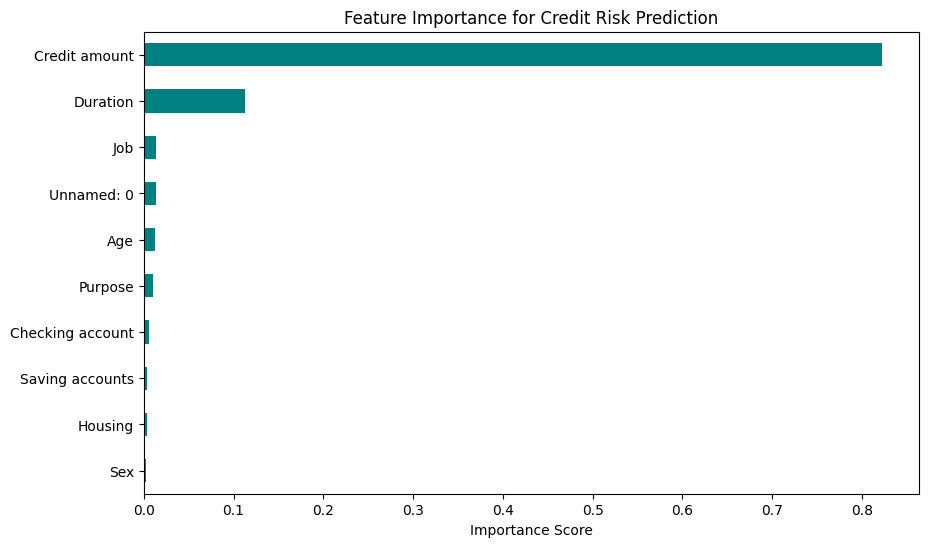

In [25]:
# Visualize most important features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), color='teal')
plt.title('Feature Importance for Credit Risk Prediction')
plt.xlabel('Importance Score')
plt.show()

### 🔍 Top Predictive Features:
- Credit amount
- Duration
- Age
- Checking account
- Purpose

> 🚨 Note: While the model achieved 100% accuracy on this dataset, this is likely due to the small and clean nature of the German Credit dataset. In real-world applications, perfect accuracy is extremely rare and should be interpreted with caution.
